In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import requests

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# First, let's look at the measurement table
inspector_m = inspect(engine)
inspector_m.get_table_names()

['measurement', 'station']

In [11]:
# get a list of columns for measurement
columns = inspector_m.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# view the measurement data
engine.execute('SELECT * FROM measurement LIMIT 15').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0)]

In [13]:
# how many rows are there in measurement
session.query(func.count(Measurement.date)).all()

[(19550)]

In [14]:
# get the earliest date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [15]:
# get the latest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [16]:
# get # of different stations
session.query(Measurement.station).group_by(Measurement.station).count()

9

Findings so far...
- There are over 19,000 rows for measurements across 9 different stations ranging from 2010-01-01 to 2017-08-23.
- There can be up to 9 different measurements per day max or 1/station so we need to sum up prcp by date to get totals.

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

In [18]:
# Step 1, Calculate the date 1 year ago from the last data point in the database
# get the latest date
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# pass result to a string
get_last_date = last_date.date
get_last_date

'2017-08-23'

In [19]:
# Step 2, parse the year, month and date from the last date string, convert to integer
last_year = int(get_last_date[0:4])
last_month = int(get_last_date[6:7])
last_day = int(get_last_date[8:10])

In [20]:
# Step 3, calculate the time delta, get the year
year_ago = dt.date(last_year, last_month, last_day) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [21]:
# Step 4, Design a query to retreive the last 12 months of precipitation data (and plot the results - see steps below)

sel = [Measurement.date,
      func.sum(Measurement.prcp)]
last_yr_rain_total = session.query(*sel).\
    filter(Measurement.date >= year_ago).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
last_yr_rain_total

[('2016-08-23', 2.71),
 ('2016-08-24', 9.329999999999998),
 ('2016-08-25', 0.54),
 ('2016-08-26', 0.09999999999999999),
 ('2016-08-27', 0.31999999999999995),
 ('2016-08-28', 3.0999999999999996),
 ('2016-08-29', 1.46),
 ('2016-08-30', 0.07),
 ('2016-08-31', 3.1799999999999997),
 ('2016-09-01', 0.03),
 ('2016-09-02', 0.25),
 ('2016-09-03', 1.27),
 ('2016-09-04', 1.3800000000000001),
 ('2016-09-05', 0.33999999999999997),
 ('2016-09-06', 1.23),
 ('2016-09-07', 2.0),
 ('2016-09-08', 0.4600000000000001),
 ('2016-09-09', 1.0699999999999998),
 ('2016-09-10', 1.4),
 ('2016-09-11', 1.25),
 ('2016-09-12', 1.54),
 ('2016-09-13', 2.71),
 ('2016-09-14', 14.280000000000001),
 ('2016-09-15', 4.96),
 ('2016-09-16', 0.8200000000000001),
 ('2016-09-17', 0.6799999999999999),
 ('2016-09-18', 0.53),
 ('2016-09-19', 0.32),
 ('2016-09-20', 1.03),
 ('2016-09-21', 1.17),
 ('2016-09-22', 1.44),
 ('2016-09-23', 1.57),
 ('2016-09-24', 0.28),
 ('2016-09-25', 0.09),
 ('2016-09-26', 1.67),
 ('2016-09-27', 1.359999999

In [22]:
# Step 5, verify table count
print(len(last_yr_rain_total))

366


In [23]:
# Step 6, convert query above (list) to a dataframe, sort by date
rain_trend = pd.DataFrame(last_yr_rain_total, columns=['Date', 'Precipitation'])
# reset the index using the date column:
rain_trend.set_index('Date')
rain_trend.sort_values(by=['Date'])
rain_trend.head()

,Date,Precipitation
0,2016-08-23,2.71
1,2016-08-24,9.33
2,2016-08-25,0.54
3,2016-08-26,0.10
4,2016-08-27,0.32


In [24]:
# Step 7, Confirm the query is doing what it should, select a date and make sure it is summing the stations 
# and it matches above, select the data for the date of 8/23/2016:
sel2 = [Measurement.date, Measurement.station, Measurement.prcp]
spot_check = session.query(*sel2).filter(Measurement.date == '2016-08-23').all()
spot_check

[('2016-08-23', 'USC00519397', 0.0),
 ('2016-08-23', 'USC00513117', 0.15),
 ('2016-08-23', 'USC00514830', 0.05),
 ('2016-08-23', 'USC00517948', None),
 ('2016-08-23', 'USC00519523', 0.02),
 ('2016-08-23', 'USC00519281', 1.79),
 ('2016-08-23', 'USC00516128', 0.7)]

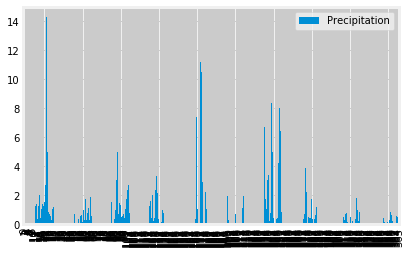

In [25]:
# Step 8, Plot the results
# convert the xaxis to format that can be read
# see the site: https://stackoverflow.com/questions/40734440/how-to-extract-only-the-month-and-day-from-a-datetime-object
# it requires that we convert the time to dates in order to display properly
# plt.xticks([])

rain_trend.plot.bar()
plt.show()

In [26]:
# Calculate the summary statistics for the precipitation data, this includes all measurements summed by day

sel3 = [Measurement.date,
      func.sum(Measurement.prcp)]
all_yrs_rain_total = session.query(*sel3).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
all_yrs_rain_total

[('2010-01-01', 1.06),
 ('2010-01-02', 0.02),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.01),
 ('2010-01-05', 0.03),
 ('2010-01-06', 0.5800000000000001),
 ('2010-01-07', 1.65),
 ('2010-01-08', 0.06),
 ('2010-01-09', 0.02),
 ('2010-01-10', 0.02),
 ('2010-01-11', 0.8800000000000001),
 ('2010-01-12', 0.02),
 ('2010-01-13', 0.02),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.01),
 ('2010-01-21', 0.65),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.02),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.25),
 ('2010-01-27', 1.6),
 ('2010-01-28', 0.73),
 ('2010-01-29', 2.19),
 ('2010-01-30', 7.3500000000000005),
 ('2010-01-31', 2.16),
 ('2010-02-01', 0.05),
 ('2010-02-02', 0.05),
 ('2010-02-03', 3.21),
 ('2010-02-04', 0.02),
 ('2010-02-05', 0.16),
 ('2010-02-06', 0.12),
 ('2010-02-07', 0.01),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-10', 0.0),
 ('2010-02-11', 0.0),
 ('2010

In [27]:
# Confirm the query is summing at group by date, select a date and make sure it is summing the stations and it matches above
# select the data for the date of 2010-01-01:
sel4 = [Measurement.date, Measurement.station, Measurement.prcp]
spot_check1 = session.query(*sel4).filter(Measurement.date == '2010-01-01').all()
spot_check1

[('2010-01-01', 'USC00519397', 0.08),
 ('2010-01-01', 'USC00513117', 0.28),
 ('2010-01-01', 'USC00518838', 0.21),
 ('2010-01-01', 'USC00519523', 0.15),
 ('2010-01-01', 'USC00519281', 0.15),
 ('2010-01-01', 'USC00511918', 0.05),
 ('2010-01-01', 'USC00516128', 0.14)]

In [28]:
# convert list to a dataframe
all_yrs_rain_trend = pd.DataFrame(all_yrs_rain_total, columns=['Date', 'Precipitation'])
# reset the index using the date column:
all_yrs_rain_trend.set_index('Date')
all_yrs_rain_trend.sort_values(by=['Date'])
# get the number of observations
len(all_yrs_rain_trend)

2792

In [29]:
# get descriptive stats of precipitation totals grouped by date
all_yrs_rain_trend.describe()

,Precipitation
count,2792.000000
mean,1.041594
std,2.224333
min,0.000000
25%,0.060000
50%,0.380000
75%,1.130000
max,37.410000


In [30]:
# get descriptive stats of precipitation totals grouped by date (this ties with the data, the summary stats below are off)
sumrain = all_yrs_rain_trend["Precipitation"].sum()
sumrain

2908.13

In [31]:
# get descriptive stats of precipitation totals grouped by date (this ties with the data, the summary stats below are off)
raindates = all_yrs_rain_trend["Date"].nunique()
raindates

2792

- I summed up the precipitation by grouping on Date, so my results differ from below. This results in 2,792 different dates where rain was measured (not 2,021). I went into the Excel sheet and built a pivot table to confirm my result there was a total of 2,908.13 inches. My results are consistent with the pivot.

In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
# This is not accurate. If the goal is to measure all the rain in Hawaii, you have to sum up all the stations by date. 
# These summary stats don't do that.

![describe](Images/describe.png)

In [33]:
# Design a query to show how many stations are available in this dataset?


In [34]:
# Step 1, get a list of columns for stations
columns1 = inspector_m.get_columns('station')
for c in columns1:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [35]:
# Step 2, get # of different stations using the station table
session.query(Station.station).count()

9

In [36]:
# get # of different stations using he measurement table
session.query(Measurement.station).group_by(Measurement.station).count()

9

- There are 9 stations from the station table and also 9 stations within the Measurement table. So the data is consistent. All 9 stations did report rain in the Measurement table.

In [37]:
# Confirm results above in step 2, view the stations data
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [38]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel5 = [Measurement.station, func.count(Measurement.date)]
station_rank = session.query(*sel5).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()
station_rank

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

- Station USC00519281 has the most observations with 2,772 from the period '2010-01-01' to '2017-08-23'

In [39]:
# Step 3, Identify the station ID with the max number of observations

sel6 = [Measurement.station] 
max_station = session.query(*sel6).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).first()
# pass result to a string
max_station = max_station.station
max_station

'USC00519281'

In [40]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

In [41]:
# Step 4, Show the station ids by lowest temp recorded, highest temp recorded and average temp

sel7 = [Measurement.station, func.count(Measurement.date), func.min(Measurement.tobs),\
        func.max(Measurement.tobs), func.avg(Measurement.tobs)]
obs_by_station = session.query(*sel7).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()
obs_by_station

[('USC00519281', 2772, 54.0, 85.0, 71.66378066378067),
 ('USC00519397', 2724, 56.0, 87.0, 74.55323054331865),
 ('USC00513117', 2709, 59.0, 85.0, 72.68918420081211),
 ('USC00519523', 2669, 56.0, 85.0, 74.5436493068565),
 ('USC00516128', 2612, 58.0, 84.0, 70.91500765696784),
 ('USC00514830', 2202, 58.0, 85.0, 74.8732970027248),
 ('USC00511918', 1979, 53.0, 87.0, 71.61596766043456),
 ('USC00517948', 1372, 58.0, 87.0, 74.68440233236151),
 ('USC00518838', 511, 58.0, 83.0, 72.72407045009784)]

- From the above we see that station id = USC00511918 has the lowest temperature at 53.0 and tied with 2 other stations (USC00519397 and USC00517948) for highest temperature.

In [42]:
# Step # 5, Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

sel8 = [Measurement.station, func.count(Measurement.date), func.min(Measurement.tobs),\
        func.max(Measurement.tobs), func.avg(Measurement.tobs)]
get_max_station_stats = session.query(*sel8).\
    filter(Measurement.station == max_station).\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
get_max_station_stats

[('USC00519281', 2772, 54.0, 85.0, 71.66378066378067)]

In [43]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

sel9 = [Measurement.date, Measurement.station, Measurement.tobs]
get_max_station_last_yr = session.query(*sel9).\
    filter(Measurement.date >= year_ago, Measurement.station==max_station).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
get_max_station_last_yr


[('2016-08-23', 'USC00519281', 77.0),
 ('2016-08-24', 'USC00519281', 77.0),
 ('2016-08-25', 'USC00519281', 80.0),
 ('2016-08-26', 'USC00519281', 80.0),
 ('2016-08-27', 'USC00519281', 75.0),
 ('2016-08-28', 'USC00519281', 73.0),
 ('2016-08-29', 'USC00519281', 78.0),
 ('2016-08-30', 'USC00519281', 77.0),
 ('2016-08-31', 'USC00519281', 78.0),
 ('2016-09-01', 'USC00519281', 80.0),
 ('2016-09-02', 'USC00519281', 80.0),
 ('2016-09-03', 'USC00519281', 78.0),
 ('2016-09-04', 'USC00519281', 78.0),
 ('2016-09-05', 'USC00519281', 78.0),
 ('2016-09-06', 'USC00519281', 73.0),
 ('2016-09-07', 'USC00519281', 74.0),
 ('2016-09-08', 'USC00519281', 80.0),
 ('2016-09-09', 'USC00519281', 79.0),
 ('2016-09-10', 'USC00519281', 77.0),
 ('2016-09-11', 'USC00519281', 80.0),
 ('2016-09-12', 'USC00519281', 76.0),
 ('2016-09-13', 'USC00519281', 79.0),
 ('2016-09-14', 'USC00519281', 75.0),
 ('2016-09-15', 'USC00519281', 79.0),
 ('2016-09-16', 'USC00519281', 78.0),
 ('2016-09-17', 'USC00519281', 79.0),
 ('2016-09-1

In [44]:
# convert to a dataframe so we can plot the histogram

max_station_df = pd.DataFrame(get_max_station_last_yr, columns=['Date', 'Station', 'Total Observations'])
# reset the index using the date column:
max_station_df.set_index('Date')
max_station_df.sort_values(by=['Date'])
max_station_df.head()

,Date,Station,Total Observations
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


<Figure size 432x288 with 0 Axes>

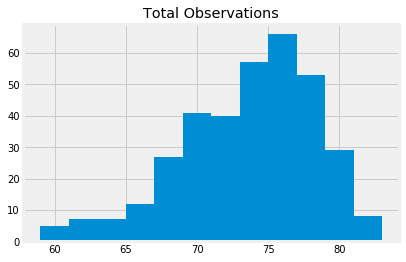

<Figure size 432x288 with 0 Axes>

In [45]:
max_station_df.hist(column='Total Observations', bins=12)
plt.figure()
#plt.ylabel("Frequency")

- Design a FLASK API based on the queries I've developed

In [46]:
# start of FLASK is here
# Flask dependencies
from flask import Flask, abort, jsonify

In [47]:
# create an app, pass __name__
app = Flask(__name__)

In [48]:
# define what to do when a user hits the index route
@app.route("/")
def welcome():
    """All available API routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs"
    )

@app.route("/api/v1.0/precipitation")
def precipitation():
    # query all dates and precipitation measurements
    results = session.query(Measurement.date, Measurement.prcp).all()

    # create a dictionary from the row data and append to a list of all measurements
    all_precipitation = []
    for date, prcp in results:
        precipitation_dict = {}
        precipitation_dict["date"] = date
        precipitation_dict["prcp"] = precipitation
        all_precipitation.append(precipitation_dict)
    
    return jsonify(all_precipitation)
    
@app.route("/api/v1.0/stations")
def stations():
    # query all the stations
    results = session.query(Station.id, Station.station, Station.name, Station.latitude,\
                            Station.longitude, Station.elevation).all()
    
    # create a dictionary from the stations, append to a list
    all_stations = []
    for id, station, name, latitude, longitude, elevation in results:
        stations_dict = {}
        stations_dict["id"] = id
        stations_dict["station"] = station
        stations_dict["name"] = name
        stations_dict["latitude"] = latitude
        stations_dict["longitude"] = longitude
        stations_dict["elevation"] = elevation
        all_stations.append(stations_dict)
        
    return jsonify(all_stations)    

# @app.route("/api/v1.0/tobs")
# def tobs():
#     # query the dates and temperature observations 1 year from the last data point
#     results = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
#     filter(Measurement.date >= year_ago).\
#     group_by(Measurement.date, Measurement.station).\
#     order_by(Measurement.date, Measurement.station).all()
    
#     # create a dictionary for the dates, stations and observations
#     all_obs = []
#     for date, station, tobs in results:
#         obs_dict = {}
#         obs_dict["date"] = date
#         obs_dict["station"] = station
#         obs_dict["tobs"] = tobs
#         all_obs.append(obs_dict)
        
#     return jsonify(all_obs)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

C:\Users\JTS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# end of FLASK is here

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
